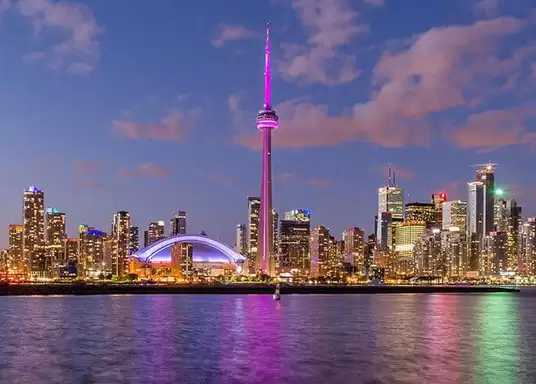

In [3]:
!pip install folium
import requests
import pandas as pd
import numpy as np
import folium


     |████████████████████████████████| 93 kB 1.4 MB/s eta 0:00:011


In [4]:

conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  xlrd               anaconda/linux-64::xlrd-1.2.0-py36_0

The following p

In [5]:
conda install -c anaconda lxml --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icu-58.2                   |       he6710b0_3        22.7 MB  anaconda
    libxml2-2.9.10             |       he19cac6_1         1.3 MB  anaconda
    libxslt-1.1.34             |       hc22bd24_0         573 KB  anaconda
    lxml-4.5.2                 |   py36hefd8a0e_0         1.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:        25.9 MB

The following NEW packages will be INSTALLED:

  icu                anaconda/linux-64::icu-58.2-he6710b0_3
  libxml2     

In [6]:
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [7]:
import lxml
df_html = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df_html.head()

,Postal Code,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [8]:
df_html.dropna(subset=['Borough'], inplace=True)

In [9]:
n_empty_neighborhood = df_html[df_html['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [10]:
df_html[df_html['Neighbourhood'].isna()]

,Postal Code,Borough,Neighbourhood


In [11]:

df_html['Neighbourhood'].fillna(df_html['Borough'], inplace=True)
n_empty_neighborhood = df_html[df_html['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [12]:
df_html[df_html['Borough']=="Queen's Park"]

,Postal Code,Borough,Neighbourhood


In [13]:
df_postcodes =pd.DataFrame( df_html.groupby(['Postal Code','Borough']).Neighbourhood.agg([('Neighbourhood', ', '.join)]))
df_postcodes.reset_index(inplace=True)
df_postcodes.head(5)

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [14]:
df_html.dropna(subset=['Borough'], inplace=True)

In [15]:

n_empty_neighborhood = df_html[df_html['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [16]:
print('The shape of the dataset is:',df_postcodes.shape)

The shape of the dataset is: (103, 3)


In [17]:
df_postcodes.to_csv('Toronto_Postcodes.csv')

In [18]:
url_csv = 'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv(url_csv)
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:

df_neighborhoods = pd.read_csv('Toronto_Postcodes.csv',index_col=[0])
df_neighborhoods.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [27]:
df_neighborhoods_coordinates = pd.merge(df_neighborhoods, df_coordinates, on='PostalCode')
df_neighborhoods_coordinates.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [29]:
df_neighborhoods_coordinates[(df_neighborhoods_coordinates['PostalCode']=='M5G') |
                             (df_neighborhoods_coordinates['PostalCode']=='M2H') ]

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
17,M2H,North York,Hillcrest Village,43.803762,-79.363452
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [30]:
df_neighborhoods_coordinates.to_csv('Toronto_Postcodes_2.csv')

In [31]:
df = pd.read_csv('Toronto_Postcodes_2.csv', index_col=0)
df.head()


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [32]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [33]:
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [34]:
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [35]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [36]:
print(df_toronto.groupby('Borough').count()['Neighborhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


In [37]:
boroughs = df_toronto['Borough'].unique().tolist()

In [38]:
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66713498717947, -79.38987324871795


In [39]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))

In [40]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [41]:
CLIENT_ID = 'LLSABZTE4AXRGDRATVV3EQXTQXZKJX1DZBI052EEVAVYCCQJ' # your Foursquare ID
CLIENT_SECRET = 'X1PKIVIPIYY3ILAKQG3XXYZD4SFJCP1ON14L4AV00LRHQRS1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [44]:
toronto_venues.shape

(1624, 7)

In [45]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


In [46]:

toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Cosmetics Shop', 'Ice Cream Shop', 'Greek Restaurant',
       'Italian Restaurant', 'Brewery', 'Juice Bar', 'Yoga Studio',
       'Fruit & Vegetable Store', 'Dessert Shop', 'Pizza Place',
       'Restaurant', 'Bookstore', 'Furniture / Home Store', 'Café', 'Spa',
       'Bubble Tea Shop', 'Grocery Store', 'Coffee Shop', 'Bakery',
       'Caribbean Restaurant', 'Indian Restaurant', 'Japanese Restaurant',
       'American Restaurant', 'Lounge', 'Frozen Yogurt Shop',
       'Liquor Store', 'Gym', 'Fast Food Restaurant', 'Fish & Chips Shop',
       'Sushi Restaurant', 'Park', 'Burrito Place', 'Pet Store',
       'Steakhouse', 'Movie Theater', 'Sandwich Place', 'Fish Market',
       'Seafood Restaurant', 'Gay Bar', 'Cheese Shop',
       'Middle Eastern Restaurant', 'Stationery Store',
       'Comfort Food Restaurant', 'Thai Restaurant', 'Coworking Space',
       'Wine Bar', 'Latin American Restaurant', 'Gastropub',
       'G

In [47]:

"Indian Restaurant" in toronto_venues['Venue Category'].unique()

True

In [48]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1624, 234)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(39, 234)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.016393,0.000000,0.000000,0.016393,0.0000,0.00,0.016393
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
6,Church and Wellesley,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.026316
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.0000,0.00,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000


In [50]:
len(to_grouped[to_grouped["Indian Restaurant"] > 0])

7

In [51]:
to_indian = to_grouped[["Neighborhoods","Indian Restaurant"]]

In [52]:
to_indian.head(9)

,Neighborhoods,Indian Restaurant
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.016393
5,Christie,0.000000
6,Church and Wellesley,0.013158
7,"Commerce Court, Victoria Hotel",0.000000
8,Davisville,0.029412


In [53]:

from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_indian.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [54]:
to_merged = to_indian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [55]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Indian Restaurant,Cluster Labels
0,Berczy Park,0.000000,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0
2,"Business reply mail Processing Centre, South C...",0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0
4,Central Bay Street,0.016393,1


In [56]:
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(1624, 9)


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.0,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall
0,Berczy Park,0.0,0,43.644771,-79.373306,Goose Island Brewhouse,43.647329,-79.373541,Beer Bar


In [57]:

to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
25,"Richmond, Adelaide, King",0.0,0,43.650571,-79.384568,Assembly Chef's Hall,43.650579,-79.383412,Food Court
25,"Richmond, Adelaide, King",0.0,0,43.650571,-79.384568,John & Sons Oyster House,43.650656,-79.381613,Seafood Restaurant
25,"Richmond, Adelaide, King",0.0,0,43.650571,-79.384568,Soho House Toronto,43.648734,-79.386541,Speakeasy
25,"Richmond, Adelaide, King",0.0,0,43.650571,-79.384568,M Square Coffee Co,43.651218,-79.383555,Coffee Shop


In [61]:
map_clusters = folium.Map(location=[lat_toronto, lon_toronto],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels']):
    
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [62]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Indian Restaurant') ]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,"Harbourfront East, Union Station, Toronto Islands",0.01,0,43.640816,-79.381752,Indian Roti House,43.63906,-79.385422,Indian Restaurant


In [64]:
#Cluster 1
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Indian Restaurant') ]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,"The Danforth West, Riverdale",0.024390,1,43.679557,-79.352188,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
8,Davisville,0.029412,1,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
30,"St. James Town, Cabbagetown",0.022222,1,43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
4,Central Bay Street,0.016393,1,43.657952,-79.387383,Colaba Junction,43.660940,-79.385635,Indian Restaurant
6,Church and Wellesley,0.013158,1,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant


In [65]:

#Cluster 2

to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Indian Restaurant') ]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
34,"The Annex, North Midtown, Yorkville",0.047619,2,43.67271,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant



**Scrutiny**

Most of the Indian restaurants are in cluster 1 